In [ ]:
dfrom google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/DDU+CE"

/content/drive/MyDrive/DDU+CE


In [ ]:
import torch
import matplotlib.pyplot as plt

from DDU.train_utils import get_data, get_fashion
from DDU.resnet_DDU import resnet18
#from DDU.resnet_sn import ResNet
from CE.gmm_utils import get_embeddings, gmm_forward, gmm_fit_ex
from CE.CE_utils import generate_CE



In [ ]:
coeff = 2

### setup model and cuda
model_name = 'model_c' + str(coeff)
model = resnet18(coeff=coeff)


device = 'cpu'
cuda = False

if torch.cuda.is_available():
    print("Model on GPU")
    model.cuda()
    device = 'cuda'
    cuda = True


model.load_state_dict(torch.load('DDU/models/' + model_name + '.pt', map_location=torch.device(device)))
model.eval()


### load GMM

means, cov_matrix = torch.load('DDU/models/' + model_name + '_gmm.pt', map_location=(device))
gmm = torch.distributions.MultivariateNormal(loc=means.to(device), covariance_matrix=cov_matrix.to(device))

Model on GPU


## MNIST

In [ ]:
### load data
trainloader, valloader, _ = get_data('data/', 100, seed=1)

### get embeddings
embeddings_tr, labels_tr = get_embeddings(model, trainloader, num_dim=512, dtype=float, device=device, storage_device=device)
embeddings_val, labels_val = get_embeddings(model, valloader, num_dim=512, dtype=float, device=device, storage_device=device)

100%|██████████| 100/100 [00:01<00:00, 50.18it/s]


### trainset MNIST

(array([6.000e+00, 1.000e+00, 2.000e+00, 1.100e+01, 1.700e+01, 4.300e+01,
        1.520e+02, 6.640e+02, 2.969e+03, 1.135e+03]),
 array([-596.99191359, -329.26705102,  -61.54218844,  206.18267414,
         473.90753671,  741.63239929, 1009.35726187, 1277.08212445,
        1544.80698702, 1812.5318496 , 2080.25671218]),
 <a list of 10 Patch objects>)

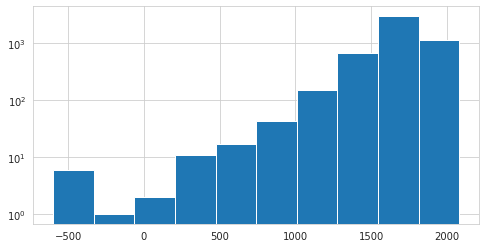

In [ ]:
### compute density
logprobs_train = torch.logsumexp(gmm.log_prob(embeddings_tr[:, None, :]),1)[:5000]
    
### plot
fig, ax =  plt.subplots(1,1, figsize=(8,4))
data = logprobs_train.tolist()
#data = list(filter(lambda item: item != float('-inf'), data))
#ax.set_xticks(xticks)
ax.hist(data, bins=10, log=True, color='tab:blue') 

### valset MNIST

(array([  1.,   0.,   0.,   0.,   1.,   2.,   1.,   3.,  21., 971.]),
 array([-11657.34053501, -10285.40177515,  -8913.46301529,  -7541.52425543,
         -6169.58549557,  -4797.64673571,  -3425.70797585,  -2053.76921599,
          -681.83045614,    690.10830372,   2062.04706358]),
 <a list of 10 Patch objects>)

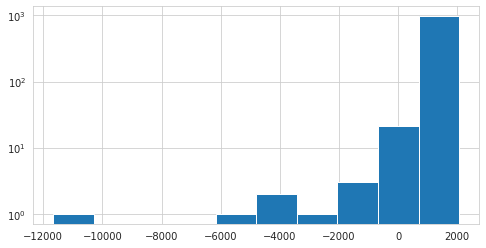

In [ ]:
### compute density
logprobs_val = torch.logsumexp(gmm.log_prob(embeddings_val[:, None, :]),1)[:1000]
    
### plot
fig, ax =  plt.subplots(1,1, figsize=(8,4))
data = logprobs_val.tolist()
#data = list(filter(lambda item: item != float('-inf'), data))
ax.hist(data, bins=10, log=True, color='tab:blue') 

## FashionMNIST

In [ ]:
### load data
fashionloader = get_fashion('data/', 100, seed=1)

### get embeddings
embeddings_fash, labels_fash = get_embeddings(model, fashionloader, num_dim=512, dtype=float, device=device, storage_device=device)

100%|██████████| 600/600 [00:11<00:00, 50.51it/s]


tensor(1.) tensor(0.)


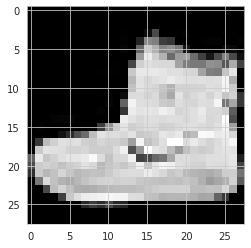

In [ ]:
x = next(iter(fashionloader))
plt.imshow(x[0][0][0], cmap ='gray')
print(x[0].max(), x[0].min())

### trainset FashionMNIST

(array([3.0000e+00, 9.0000e+00, 2.4000e+01, 5.6000e+01, 1.1400e+02,
        1.5900e+02, 1.7700e+02, 3.3500e+02, 1.6740e+03, 5.7449e+04]),
 array([-413098.26423356, -371662.75931059, -330227.25438762,
        -288791.74946465, -247356.24454168, -205920.73961871,
        -164485.23469574, -123049.72977276,  -81614.22484979,
         -40178.71992682,    1256.78499615]),
 <a list of 10 Patch objects>)

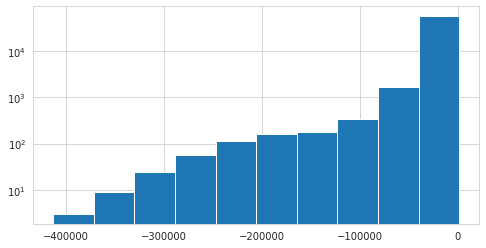

In [ ]:
### compute density
logprobs_fash = torch.logsumexp(gmm.log_prob(embeddings_fash[:, None, :]),1)
    
### plot
fig, ax =  plt.subplots(1,1, figsize=(8,4))
data = logprobs_fash.tolist()
#data = list(filter(lambda item: item != float('-inf'), data))
#ax.set_xticks(xticks)
ax.hist(data, bins=10, log=True, color='tab:blue') 

# together

(array([2.68557414e-05, 2.85883698e-05, 3.03787526e-05, 3.30354496e-05,
        3.87531235e-05, 4.19296091e-05, 4.92066487e-05, 4.96109287e-05,
        5.60794083e-05, 6.28366593e-05, 7.04602246e-05, 8.42634981e-05,
        8.85950693e-05, 1.03091394e-04, 1.19435856e-04, 1.28214507e-04,
        1.40862695e-04, 1.52586814e-04, 1.71010430e-04, 1.75457510e-04,
        1.82214761e-04, 1.72338779e-04, 1.55590037e-04, 1.39476592e-04,
        1.20417679e-04, 9.23490977e-05, 7.88345956e-05, 6.26056422e-05,
        5.05927515e-05, 2.16001016e-05]),
 array([-10000.        ,  -9633.33333333,  -9266.66666667,  -8900.        ,
         -8533.33333333,  -8166.66666667,  -7800.        ,  -7433.33333333,
         -7066.66666667,  -6700.        ,  -6333.33333333,  -5966.66666667,
         -5600.        ,  -5233.33333333,  -4866.66666667,  -4500.        ,
         -4133.33333333,  -3766.66666667,  -3400.        ,  -3033.33333333,
         -2666.66666667,  -2300.        ,  -1933.33333333,  -1566.66666667

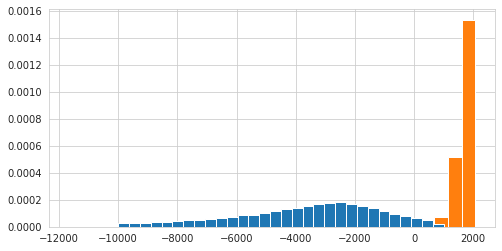

In [ ]:
### plot
fig, ax =  plt.subplots(1,1, figsize=(8,4))
fmnist = logprobs_fash.tolist()
mnist = logprobs_val.tolist()
#data = list(filter(lambda item: item != float('-inf'), data))
#ax.set_xticks(xticks)
ax.hist(mnist, bins=30, log=False, color='tab:orange', density=True)
ax.hist(fmnist, bins=30, log=False, color='tab:blue', density=True, range=(-10000,1000))  


In [ ]:
# nice plot with code taken from https://github.com/omegafragger/DDU/blob/main/notebooks/fig_1_plot.ipynb

import seaborn as sb

def plot_density(data1, data2, binrange, separate_ID=False):
    clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
    sb.set_style('whitegrid')

    plt.figure(figsize=(3,3/1.6))
    plt.tight_layout()

    range = dict(bins=30, binrange=binrange, element="step", fill=True, alpha=0.7)
    kw_separate_id = dict(hue="category", multiple="stack",
                hue_order=[1, 0],
                palette=[sb.color_palette()[4], sb.color_palette()[0]]) if separate_ID else dict(color=sb.color_palette()[0])

    sb.histplot(data1, color=sb.color_palette()[0],
                stat='probability', kde=False, **range, label="dummy", legend=False) # 'Dirty-MNIST (In-distribution)')
    sb.histplot(data2, color=sb.color_palette()[1],
                stat='probability', kde=False, **range, label="dummy", legend=False) #, label='Fashion-MNIST (OoD)')


    plt.xlabel('Log Density', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)

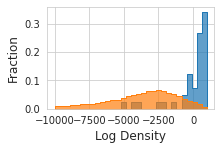

In [ ]:
plot_density(mnist, fmnist, binrange=[-10000, 1000], separate_ID=True)